In [1]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
import numpy as np 

import lightgbm
import itertools

In [2]:
url_train = 'https://raw.githubusercontent.com/Rob-Bruton/Kaggle-Titanic/master/train.csv'
url_test = 'https://raw.githubusercontent.com/Rob-Bruton/Kaggle-Titanic/master/test.csv'

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

submission = df_test.copy()

df_combine = pd.concat([df_train, df_test], sort=False)



In [3]:
df_combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_combine.shape

(1309, 12)

In [5]:
df_combine.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
# Proportions of passengers by Pclass
df_combine.Pclass.value_counts(normalize=True, sort=False)

1    0.246753
2    0.211612
3    0.541635
Name: Pclass, dtype: float64

In [8]:
# Proprotions of passengers by Sex
df_combine.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [9]:
df_combine.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
# Inspect null values for Embarked

df_combine[df_combine.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
df_combine.loc[[61, 829], ['Embarked']] = 'S'

(array([34., 17., 11., 10., 14.,  8., 13., 27., 59., 55., 85., 75., 65.,
        63., 73., 49., 41., 56., 25., 39., 32., 19., 29., 28., 24., 14.,
        14., 13., 11., 10., 11.,  9.,  4.,  1.,  2.,  3.,  1.,  1.,  0.,
         1.]),
 array([ 0.17   ,  2.16575,  4.1615 ,  6.15725,  8.153  , 10.14875,
        12.1445 , 14.14025, 16.136  , 18.13175, 20.1275 , 22.12325,
        24.119  , 26.11475, 28.1105 , 30.10625, 32.102  , 34.09775,
        36.0935 , 38.08925, 40.085  , 42.08075, 44.0765 , 46.07225,
        48.068  , 50.06375, 52.0595 , 54.05525, 56.051  , 58.04675,
        60.0425 , 62.03825, 64.034  , 66.02975, 68.0255 , 70.02125,
        72.017  , 74.01275, 76.0085 , 78.00425, 80.     ]),
 <BarContainer object of 40 artists>)

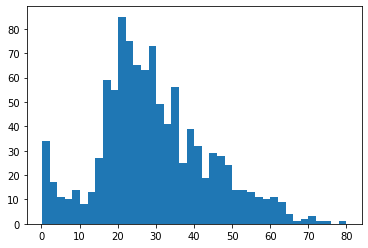

In [12]:
plt.hist(data=df_combine, x='Age', bins=40)

(array([560., 267., 197.,  46.,  62.,  40.,  41.,  11.,  13.,   4.,  13.,
         12.,   4.,   0.,   0.,   0.,   9.,   9.,   0.,   3.,  13.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([  0.     ,  12.80823,  25.61646,  38.42469,  51.23292,  64.04115,
         76.84938,  89.65761, 102.46584, 115.27407, 128.0823 , 140.89053,
        153.69876, 166.50699, 179.31522, 192.12345, 204.93168, 217.73991,
        230.54814, 243.35637, 256.1646 , 268.97283, 281.78106, 294.58929,
        307.39752, 320.20575, 333.01398, 345.82221, 358.63044, 371.43867,
        384.2469 , 397.05513, 409.86336, 422.67159, 435.47982, 448.28805,
        461.09628, 473.90451, 486.71274, 499.52097, 512.3292 ]),
 <BarContainer object of 40 artists>)

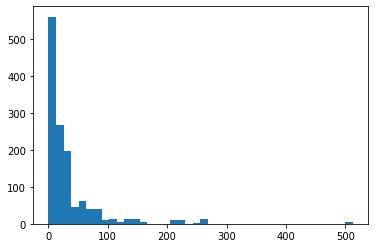

In [13]:
plt.hist(data=df_combine, x='Fare', bins=40)

(array([891., 319.,  42.,  20.,  22.,   6.,   0.,   9.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

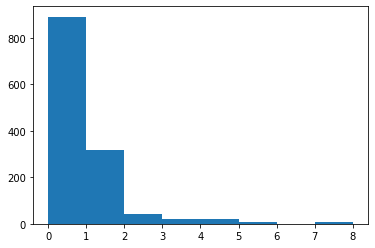

In [14]:
plt.hist(data=df_combine, x='SibSp', bins=8)

(array([1002.,  170.,  113.,    8.,    6.,    6.,    2.,    0.,    2.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

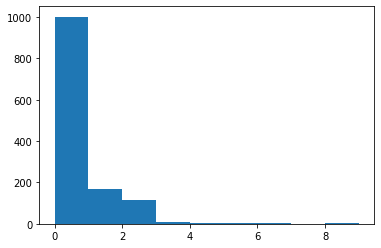

In [15]:
plt.hist(data=df_combine, x='Parch', bins=9)

In [16]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 165.2+ KB


In [17]:
df_combine[df_combine.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [18]:
df_combine.Fare.groupby(df_combine.Pclass).mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [19]:
df_combine.loc[152, ['Fare']] = 13

In [20]:
df_combine.Age = df_combine.Age.groupby([df_combine.Pclass, df_combine.Sex]).transform(lambda x: x.fillna(x.mean()))

In [21]:
df_combine['Title'] = df_combine.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_combine.Survived.groupby(df_combine.Title).mean()

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [22]:
df_combine.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Major         2
Ms            2
Mme           1
Dona          1
Jonkheer      1
Sir           1
Don           1
Countess      1
Lady          1
Capt          1
Name: Title, dtype: int64

In [23]:
df_combine.Title = df_combine.Title.replace(['Capt', 'Col', 'Dr', 'Major', 'Rev', 'Don', 'Sir', 'Jonkheer'], 'Mr')
df_combine.Title = df_combine.Title.replace(['Ms', 'Mlle'], 'Miss')
df_combine.Title = df_combine.Title.replace(['Mme', 'Lady', 'Countess', 'Dona'], 'Mrs')
df_combine.Title.value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [24]:
df_combine['SibSp'].head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [25]:
df_combine['Parch'].head()

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

In [26]:
df_combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [27]:
# Combine SibSp with Parch as one Family
df_combine['Fam'] = df_combine.SibSp + df_combine.Parch

df_combine['Ticket_Frequency'] = df_combine.groupby('Ticket')['Ticket'].transform('count')

df_combine.loc[df_combine['Fam'] == 0, 'Solo'] = 1
df_combine.loc[df_combine['Ticket_Frequency'] == 1, 'Solo'] = 1
df_combine.Solo = df_combine.Solo.fillna(0)

df_combine['Fare'] = pd.qcut(df_combine.Fare, q=9, labels=np.arange(1,10))

df_combine['Age'] = pd.qcut(df_combine.Age, q=10, labels=np.arange(1,11))

df_combine = pd.concat([df_combine, pd.get_dummies(df_combine.Sex)], axis=1)
df_combine.rename(columns={'male':'Male', 'female':'Female'}, inplace=True)

# One Hot Encode
df_combine = pd.concat([df_combine, pd.get_dummies(df_combine.Embarked, prefix='Embarked')], axis=1)

df_combine = pd.concat([df_combine, pd.get_dummies(df_combine.Title)], axis=1)

df_combine = df_combine.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked', 'Title'])

df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       1309 non-null   int64   
 1   Survived          891 non-null    float64 
 2   Pclass            1309 non-null   int64   
 3   Age               1309 non-null   category
 4   Fare              1309 non-null   category
 5   Fam               1309 non-null   int64   
 6   Ticket_Frequency  1309 non-null   int64   
 7   Solo              1309 non-null   float64 
 8   Female            1309 non-null   uint8   
 9   Male              1309 non-null   uint8   
 10  Embarked_C        1309 non-null   uint8   
 11  Embarked_Q        1309 non-null   uint8   
 12  Embarked_S        1309 non-null   uint8   
 13  Master            1309 non-null   uint8   
 14  Miss              1309 non-null   uint8   
 15  Mr                1309 non-null   uint8   
 16  Mrs               1309 no

In [28]:
df_combine.head()

,PassengerId,Survived,Pclass,Age,Fare,Fam,Ticket_Frequency,Solo,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs
0,1,0.0,3,3,1,1,1,1.0,0,1,0,0,1,0,0,1,0
1,2,1.0,1,8,8,1,2,0.0,1,0,1,0,0,0,0,0,1
2,3,1.0,3,5,3,0,1,1.0,1,0,0,0,1,0,1,0,0
3,4,1.0,1,8,8,1,2,0.0,1,0,0,0,1,0,0,0,1
4,5,0.0,3,8,3,0,1,1.0,0,1,0,0,1,0,0,1,0


In [29]:
df_combine.Survived.groupby(df_combine.Fam).mean()

Fam
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [30]:
df_combine.Fam = pd.cut(df_combine.Fam, bins=[0,1,3,7,11], include_lowest=True, right=False, labels=[1,2,3,4])
df_combine.Fam.value_counts()

1    790
2    394
3    106
4     19
Name: Fam, dtype: int64

In [31]:
df_combine.Survived.groupby(df_combine.Ticket_Frequency).mean()

Ticket_Frequency
1     0.270270
2     0.513812
3     0.653465
4     0.727273
5     0.333333
6     0.210526
7     0.208333
8     0.384615
11    0.000000
Name: Survived, dtype: float64

In [32]:
df_combine.Ticket_Frequency = pd.cut(df_combine.Ticket_Frequency, bins=[0,2,5,9,12], right=False, labels=[1,2,3,4])
df_combine.Ticket_Frequency.value_counts()

1    713
2    475
3    110
4     11
Name: Ticket_Frequency, dtype: int64

In [33]:
cols = list(df_combine)
cols

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'Fare',
 'Fam',
 'Ticket_Frequency',
 'Solo',
 'Female',
 'Male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Master',
 'Miss',
 'Mr',
 'Mrs']

In [34]:
# Min Max Scaler to scale all feaature columns to range 0-1
scaler = MinMaxScaler()
df_combine[cols] = scaler.fit_transform(df_combine[cols])

In [35]:
labels = df_combine.loc[:890, 'Survived']
df_combine = df_combine.drop(columns='Survived')
features = df_combine.iloc[:891]
df_test = df_combine.iloc[891:]
feat_names = features.columns.values

In [36]:
# KBest to narrow down to top features

k = SelectKBest(k=11)
k.fit(features, labels)
k_scores = (k.scores_)
features = k.transform(features)
df_test = k.transform(df_test)

In [37]:
# Make df to show scores

feat_scores = pd.DataFrame()
feat_scores['Feature'] = feat_names
feat_scores['Score'] = k_scores
feat_scores

,Feature,Score
0,PassengerId,0.022285
1,Pclass,115.031272
2,Age,0.118749
3,Fare,108.327062
4,Fam,10.941714
5,Ticket_Frequency,17.149390
6,Solo,47.368609
7,Female,372.405724
8,Male,372.405724
9,Embarked_C,25.895987


In [38]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=3)

In [39]:
# Base Classifier

gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
ab = AdaBoostClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression(solver='liblinear')
kn = KNeighborsClassifier()
svc = SVC(gamma='auto', probability=True)
gnb = GaussianNB()

In [40]:
gb.fit(features_train, labels_train)
print('GB Score:', gb.score(features_test, labels_test))
rf.fit(features_train, labels_train)
print('RF Score:', rf.score(features_test, labels_test))
et.fit(features_train, labels_train)
print('ET Score:', et.score(features_test, labels_test))
ab.fit(features_train, labels_train)
print('AB Score:', ab.score(features_test, labels_test))
dt.fit(features_train, labels_train)
print('DT Score:', dt.score(features_test, labels_test))
lr.fit(features_train, labels_train)
print('LR Score:', lr.score(features_test, labels_test))
kn.fit(features_train, labels_train)
print('KN Score:', kn.score(features_test, labels_test))
svc.fit(features_train, labels_train)
print('SVC Score:', svc.score(features_test, labels_test))
gnb.fit(features_train, labels_train)
print('GNB Score:', gnb.score(features_test, labels_test))

GB Score: 0.8156424581005587
RF Score: 0.8324022346368715
ET Score: 0.8100558659217877
AB Score: 0.8044692737430168
DT Score: 0.8156424581005587
LR Score: 0.8212290502793296
KN Score: 0.8044692737430168
SVC Score: 0.8044692737430168
GNB Score: 0.7821229050279329


In [41]:
# Grid search to tune base classifier hyperparameters

alg = gb
params = {'n_estimators': (10, 25, 50, 100), 'learning_rate': (0.01, 0.1, 0.5, 1, 5, 10)}
clf = GridSearchCV(alg, params, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(features_train, labels_train)
print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)
gb = clf.best_estimator_

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best Score: 0.8286713286713286


In [42]:
# Grid search to tune base classifier hyperparameters

alg = rf
params = {'n_estimators': (10, 25, 50, 100), 'min_samples_split': (2, 3, 4, 5, 10), 'min_samples_leaf': (1, 2, 3, 4, 5)}
clf = GridSearchCV(alg, params, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(features_train, labels_train)
print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)
rf = clf.best_estimator_

Best Parameters: {'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 10}
Best Score: 0.8371220328966806


In [43]:
# Grid search to tune base classifier hyperparameters

alg = et
params = {'n_estimators': (10, 25, 50, 100), 'min_samples_split': (2, 3, 4, 5, 10), 'min_samples_leaf': (1, 2, 3, 4, 5)}
clf = GridSearchCV(alg, params, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(features_train, labels_train)
print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)
et = clf.best_estimator_

Best Parameters: {'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.8315276273022751


In [44]:
# Grid search to tune base classifier hyperparameters

alg = ab
params = {'n_estimators': (10, 25, 50, 100), 'learning_rate': (0.01, 0.1, 0.5, 1, 5, 10)}
clf = GridSearchCV(alg, params, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(features_train, labels_train)
print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)
ab = clf.best_estimator_

Best Parameters: {'learning_rate': 1, 'n_estimators': 10}
Best Score: 0.8146262188515709


In [45]:
# Grid search to tune base classifier hyperparameters

alg = dt
params = {'min_samples_split': (2, 3, 4, 5, 10), 'min_samples_leaf': (1, 2, 3, 4, 5)}
clf = GridSearchCV(alg, params, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(features_train, labels_train)
print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)
dt = clf.best_estimator_

Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 4}
Best Score: 0.8174726681768935


In [46]:
# Grid search to tune base classifier hyperparameters

alg = lr
params = {'penalty': ('l1', 'l2'), 'C': (0.01, 0.1, 0.5, 1, 5, 10), 'max_iter': (100, 500)}
clf = GridSearchCV(alg, params, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(features_train, labels_train)
print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)
lr = clf.best_estimator_

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1'}
Best Score: 0.8188417216586231


In [47]:
# Grid search to tune base classifier hyperparameters

alg = kn
params = {'n_neighbors': (2, 3, 4, 5, 10, 20)}
clf = GridSearchCV(alg, params, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(features_train, labels_train)
print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)
kn = clf.best_estimator_

Best Parameters: {'n_neighbors': 10}
Best Score: 0.8118388653599922


In [48]:
# Grid search to tune base classifier hyperparameters

alg = svc
params = {'C': (0.01, 0.1, 0.5, 1, 5, 10), 'kernel': ('linear', 'poly', 'rbf', 'sigmoid')}
clf = GridSearchCV(alg, params, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(features_train, labels_train)
print('Best Parameters:', clf.best_params_)
print('Best Score:', clf.best_score_)
svc = clf.best_estimator_

Best Parameters: {'C': 10, 'kernel': 'poly'}
Best Score: 0.8244558258642766


In [49]:
gb.fit(features_train, labels_train)
print('GB Score:', gb.score(features_test, labels_test))
rf.fit(features_train, labels_train)
print('RF Score:', rf.score(features_test, labels_test))
et.fit(features_train, labels_train)
print('ET Score:', et.score(features_test, labels_test))
ab.fit(features_train, labels_train)
print('AB Score:', ab.score(features_test, labels_test))
dt.fit(features_train, labels_train)
print('DT Score:', dt.score(features_test, labels_test))
lr.fit(features_train, labels_train)
print('LR Score:', lr.score(features_test, labels_test))
kn.fit(features_train, labels_train)
print('KN Score:', kn.score(features_test, labels_test))
svc.fit(features_train, labels_train)
print('SVC Score:', svc.score(features_test, labels_test))
gnb.fit(features_train, labels_train)
print('GNB Score:', gnb.score(features_test, labels_test))

GB Score: 0.8379888268156425
RF Score: 0.8324022346368715
ET Score: 0.8268156424581006
AB Score: 0.7988826815642458
DT Score: 0.8100558659217877
LR Score: 0.8212290502793296
KN Score: 0.8324022346368715
SVC Score: 0.8379888268156425
GNB Score: 0.7821229050279329


In [51]:
# Setup voting classifier and getting cross validation score

vote = VotingClassifier(estimators=[('gb', gb), ('rf', rf), ('et', et), ('ab', ab), ('dt', dt), ('lr', lr), ('kn', kn), ('svc', svc), ('gnb', gnb)], voting='soft')
vote.fit(features, labels)
cross_val_score(vote, features, labels, cv=5, scoring='accuracy').mean()

0.8282781997363632

In [52]:
vote.fit(features_train, labels_train)
print('Voting Score:', vote.score(features_test, labels_test))

Voting Score: 0.8324022346368715


In [53]:
clfs = [('gb', gb), ('rf', rf), ('et', et), ('ab', ab), ('dt', dt), ('lr', lr), ('kn', kn), ('svc', svc), ('gnb', gnb)]
combs = []

for i in range(2, len(clfs)+1):
    comb = [list(x) for x in itertools.combinations(clfs, i)]
    combs.extend(comb)

In [54]:
alg = vote
params = {'estimators': combs}
clf = GridSearchCV(alg, params, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(features, labels)
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
vote = clf.best_estimator_

Best Parameters: {'estimators': [('rf', RandomForestClassifier(min_samples_leaf=4, min_samples_split=4, n_estimators=10)), ('et', ExtraTreesClassifier(min_samples_leaf=3, min_samples_split=10, n_estimators=50)), ('kn', KNeighborsClassifier(n_neighbors=10))]}
Best Score: 0.8350323269097985


In [55]:
vote.fit(features_train, labels_train)
print('Voting Score:', vote.score(features_test, labels_test))

Voting Score: 0.8268156424581006


In [56]:
vote.fit(features, labels)
pred_prob = pd.DataFrame(vote.predict_proba(df_test))
threshold = 0.55
y_pred = pred_prob.applymap(lambda x: 1 if x > threshold else 0)

In [58]:
url_submission = 'https://raw.githubusercontent.com/Rob-Bruton/Kaggle-Titanic/master/submission.csv'

submission['Survived'] = y_pred[1].astype(int)
submission = submission[['PassengerId', 'Survived']]
submission.to_csv(url_submission, index=False)
submission

<ipython-input-58-b30385dd78e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Survived'] = y_pred[1].astype(int)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Rewritten from this Repositories [link](https://github.com/Rob-Bruton/Kaggle-Titanic)